### Nesse projeto eu uso dados do satelite S-NPP coletados do site da nasa para validar uma noticia publicada pela CNN Brasil sobre o aumento de focos de incendios entre os meses de janeiro a agorsto do ano de 2021 comparado com o mesmo periodo do ano de 2020.

In [37]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import folium
from folium import plugins
import pydeck as pdk
import plotly.offline as py
from mpl_toolkits.basemap import Basemap
from datetime import datetime as dt
import cufflinks as cf
cf.go_offline()
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")

In [38]:
incendios_df = pd.read_csv('/home/eduardo/projetos/analise_queimadas/incendios_mes.csv')

In [39]:
incendios_df.head()

,mes_fire,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,2020-01,-4.634367,-44.920513,330.36,0.39,0.36,2020-01-01,418,N,VIIRS,n,1,282.50,3.16,N,0
1,2020-01,-4.634920,-44.917027,308.77,0.39,0.36,2020-01-01,418,N,VIIRS,n,1,282.10,1.22,N,0
2,2020-01,-17.749628,-42.892834,319.87,0.52,0.42,2020-01-01,418,N,VIIRS,n,1,288.60,2.50,N,0
3,2020-01,-19.058695,-42.941364,303.55,0.54,0.42,2020-01-01,418,N,VIIRS,n,1,288.86,0.75,N,0
4,2020-01,-17.131834,-56.512676,313.63,0.35,0.57,2020-01-01,418,N,VIIRS,n,1,280.71,1.63,N,0


### Verificando o tamanho do dataset.

In [40]:
incendios_df.shape

(2985749, 16)

### Obtendo uma visão geral dos dados.

In [41]:
incendios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985749 entries, 0 to 2985748
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   mes_fire    object 
 1   latitude    float64
 2   longitude   float64
 3   brightness  float64
 4   scan        float64
 5   track       float64
 6   acq_date    object 
 7   acq_time    int64  
 8   satellite   object 
 9   instrument  object 
 10  confidence  object 
 11  version     int64  
 12  bright_t31  float64
 13  frp         float64
 14  daynight    object 
 15  type        int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 364.5+ MB


### Verificando se existe dados faltantes no dataset.

In [42]:
incendios_df.isna().sum()

mes_fire      0
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

### Distribuicao das variaveis de acordo com a intensidade dos focos de incendios.

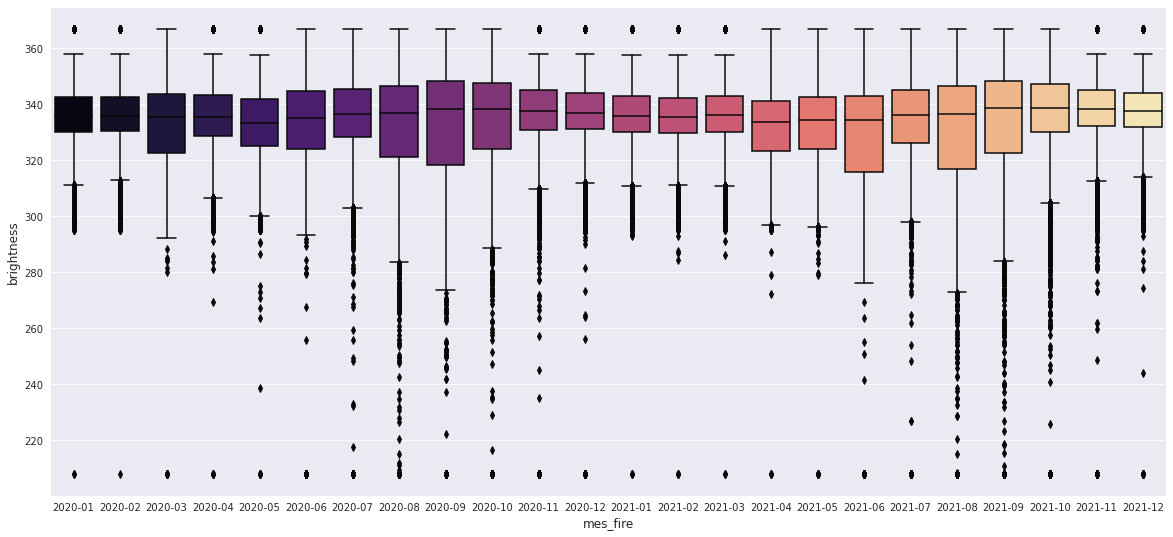

In [43]:
plt.figure(figsize=(20,9))
sns.boxplot(x = incendios_df['mes_fire'],y = incendios_df['brightness'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

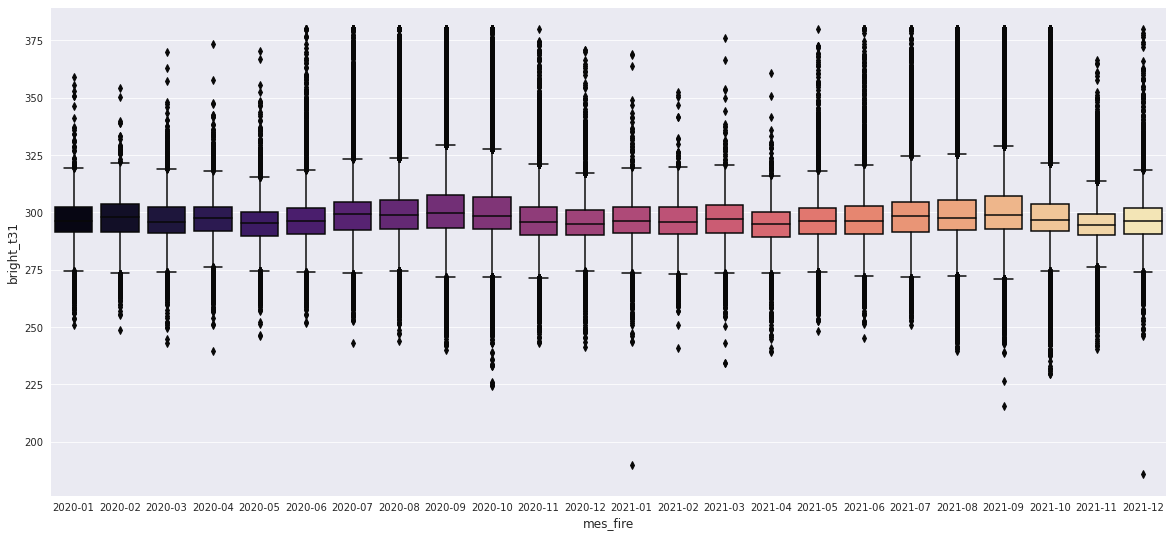

In [44]:
plt.figure(figsize=(20,9))
sns.boxplot(x = incendios_df['mes_fire'],y = incendios_df['bright_t31'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

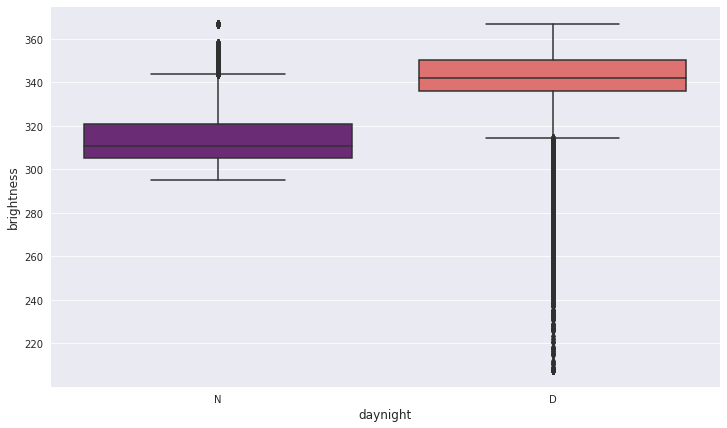

In [45]:
plt.figure(figsize=(12,7))
sns.boxplot(x = incendios_df['daynight'],y = incendios_df['brightness'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

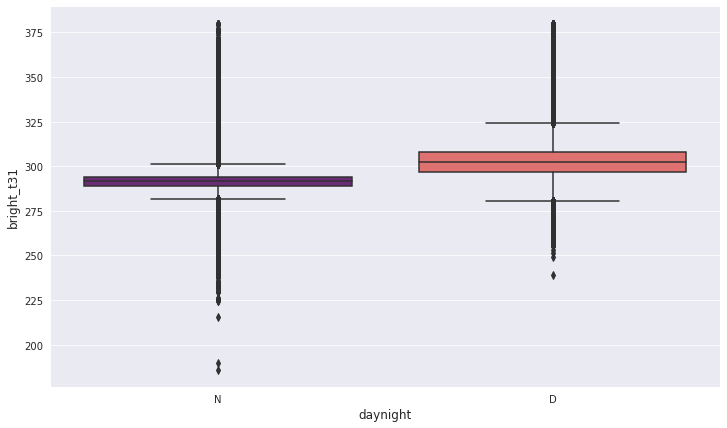

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x = incendios_df['daynight'],y = incendios_df['bright_t31'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

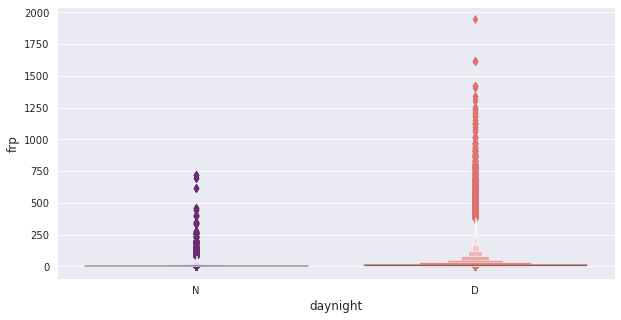

In [47]:
plt.figure(figsize=(10,5))
sns.boxenplot(x = incendios_df['daynight'],y = incendios_df['frp'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

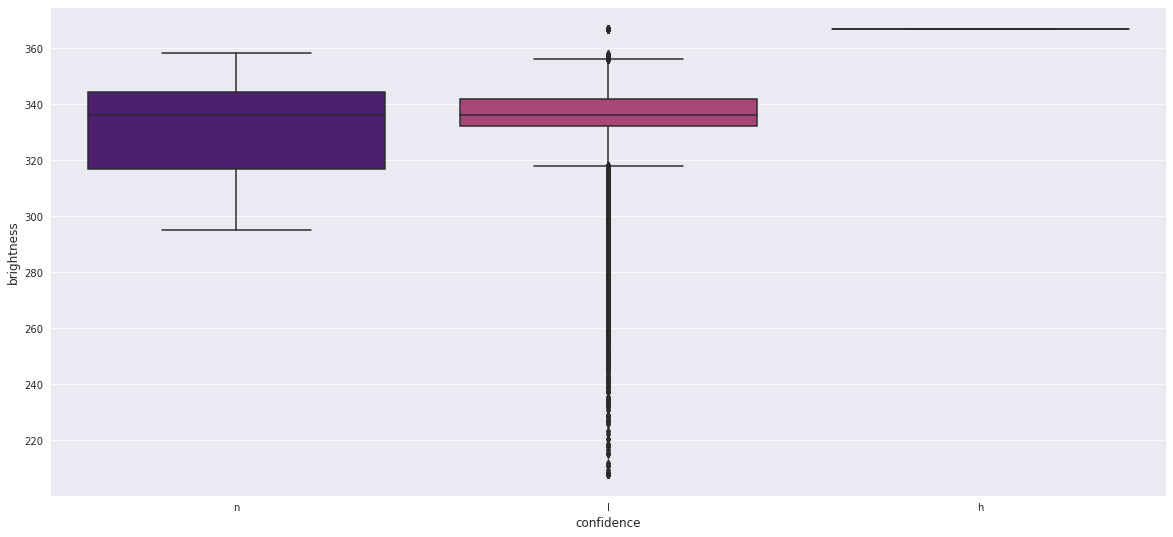

In [48]:
plt.figure(figsize=(20,9))
sns.boxplot(x = incendios_df['confidence'],y = incendios_df['brightness'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

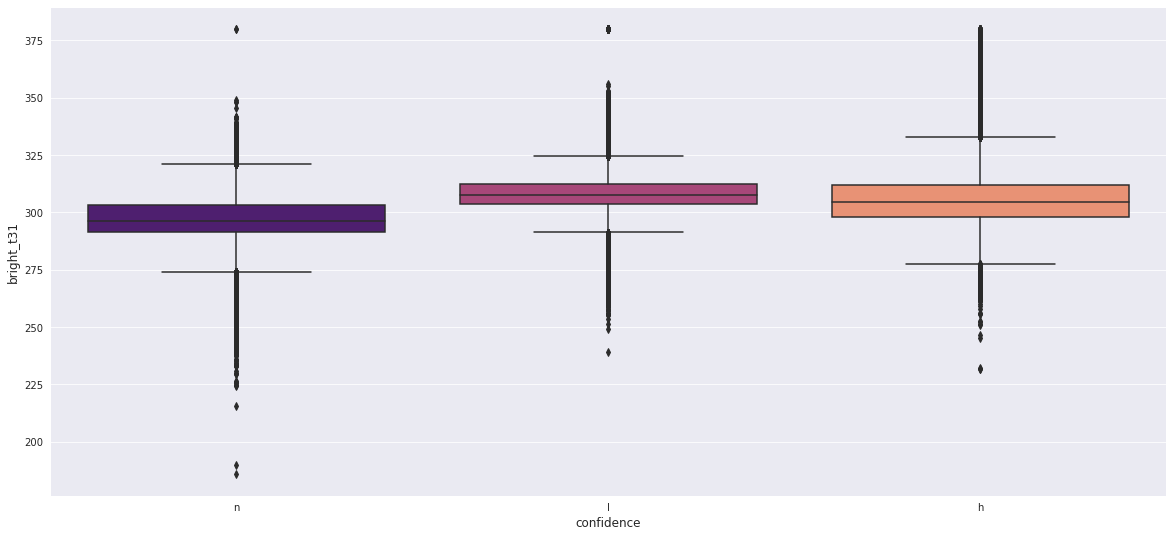

In [49]:
plt.figure(figsize=(20,9))
sns.boxplot(x = incendios_df['confidence'],y = incendios_df['bright_t31'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

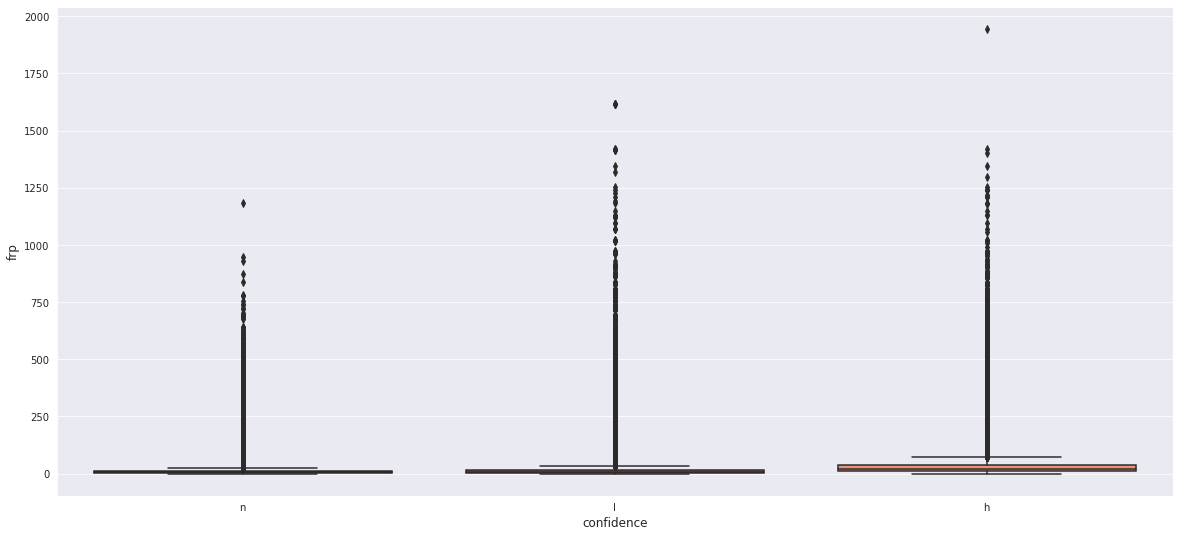

In [50]:
plt.figure(figsize=(20,9))
sns.boxplot(x = incendios_df['confidence'],y = incendios_df['frp'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

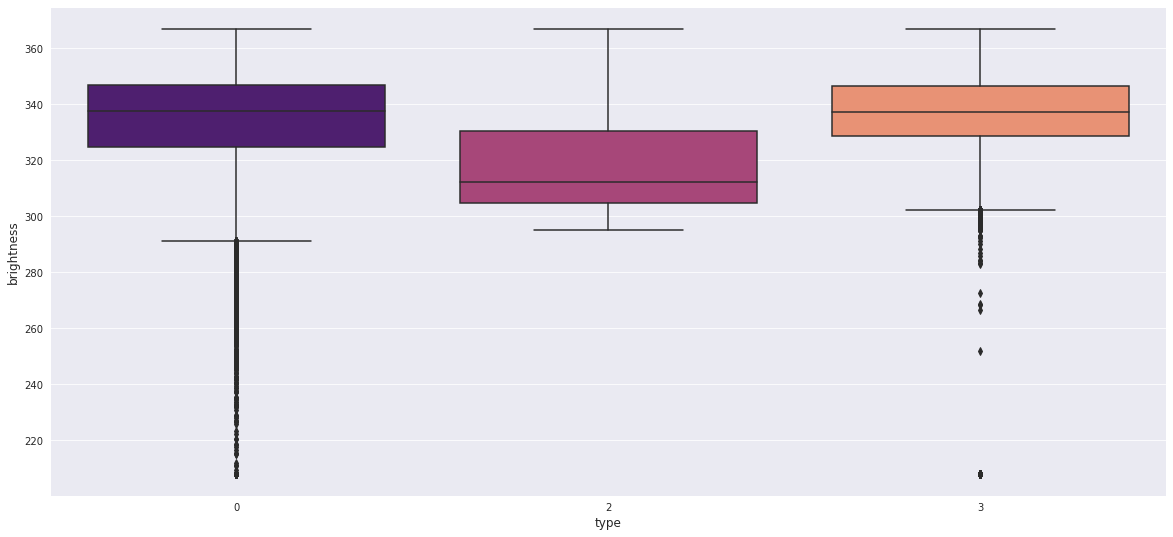

In [51]:
plt.figure(figsize=(20,9))
sns.boxplot(x = incendios_df['type'],y = incendios_df['brightness'], color ='#35c279',
                palette = "magma")
plt.axis('on')
plt.show()

### Distribuicao das variaveis quantitativas.

<AxesSubplot:xlabel='brightness'>

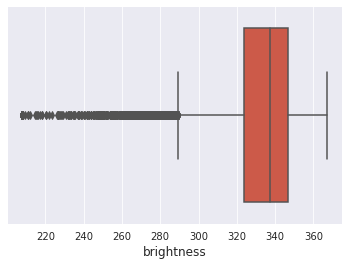

In [52]:
sns.boxplot(x = 'brightness', data=incendios_df)

<AxesSubplot:xlabel='scan'>

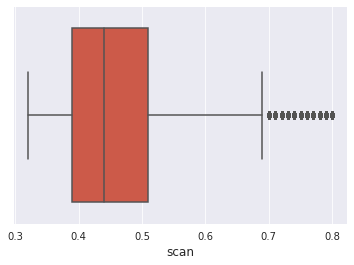

In [53]:
sns.boxplot(x = 'scan', data=incendios_df)

<AxesSubplot:xlabel='track'>

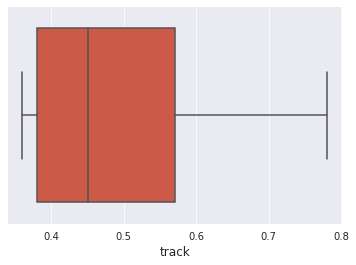

In [54]:
sns.boxplot(x = 'track', data=incendios_df)

<AxesSubplot:xlabel='bright_t31'>

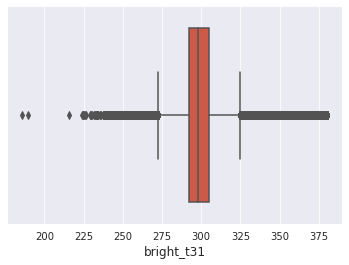

In [55]:
sns.boxplot(x = 'bright_t31', data=incendios_df)

### O mapa abaixo demonstra o grau de confianca que o algoritmo tem sobre ser ou nao um foco de incendio.

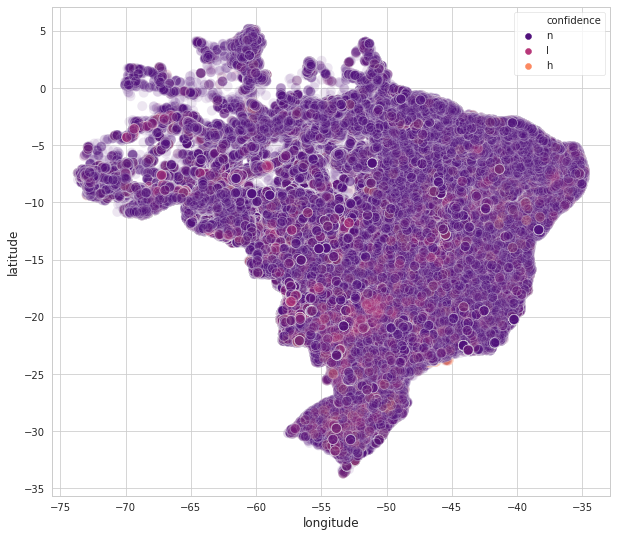

In [56]:
plt.figure(figsize=(10,9))
sns.set_style('whitegrid')
sns.scatterplot(incendios_df['longitude'],incendios_df['latitude'], alpha=0.1, hue = incendios_df['confidence'],
                palette = "magma", s=100)
plt.axis('on')
plt.show()

### Analisando como os focos de incendios se comportam no decorrer dos meses com grafico de linha.

In [57]:
incendios_por_mes = incendios_df.groupby(by=['mes_fire']).sum().reset_index()

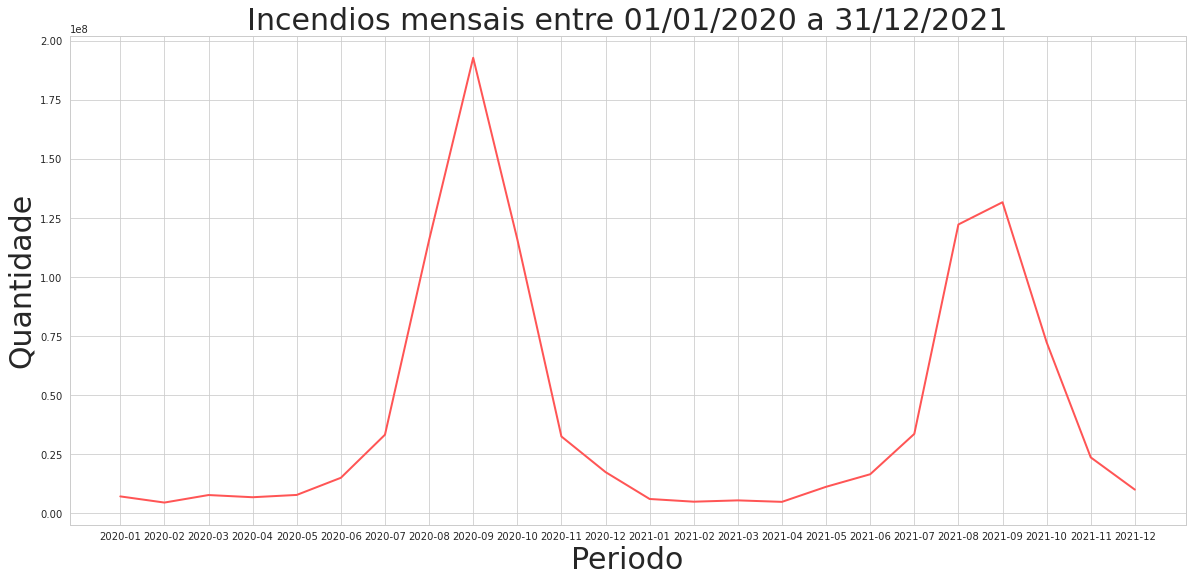

In [58]:
plt.figure(figsize=(20,9))
plt.title('Incendios mensais entre 01/01/2020 a 31/12/2021', fontsize=30)
plt.style.use('ggplot')
sns.lineplot(data= incendios_por_mes, 
             x='mes_fire', 
             y='brightness', 
             estimator='sum', 
             lw=2,
             color='#ff5555')
plt.xlabel('Periodo', fontsize=30)
plt.ylabel('Quantidade', fontsize=30)
plt.show()

### Analisando como os focos de incendios se comportam no decorrer dos meses com grafico de barras.

In [59]:
focos_por_mes = incendios_df.pivot_table('brightness', 'mes_fire', aggfunc='count')

In [60]:
focos_por_mes = focos_por_mes.reset_index()

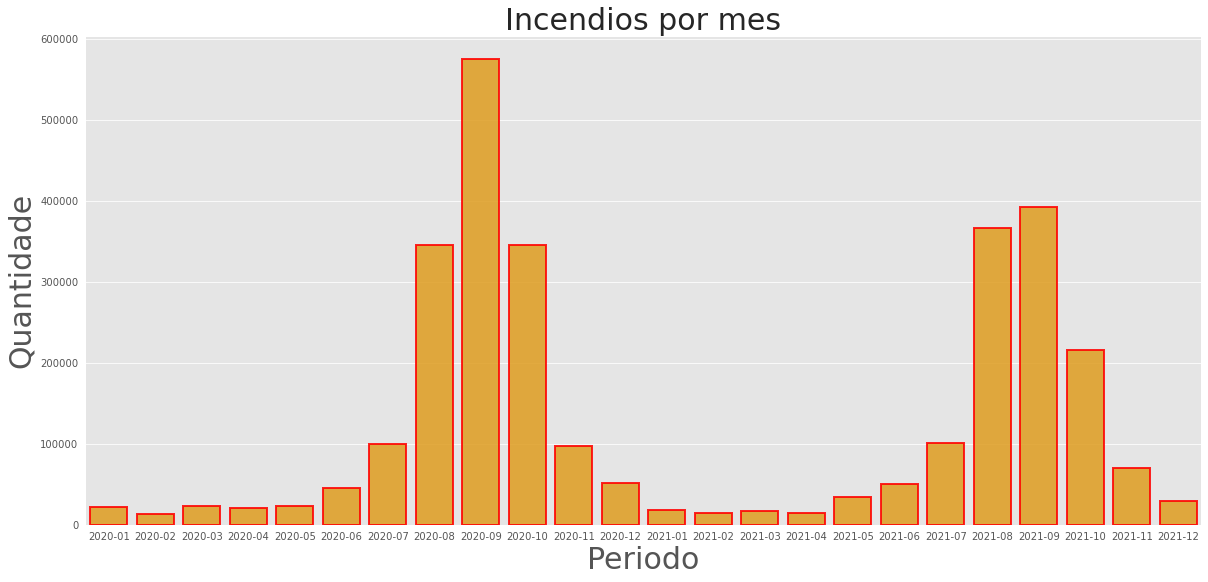

In [61]:
plt.figure(figsize=(20,9))
plt.title('Incendios por mes', fontsize=30)
plt.ylabel('Incendios', fontsize=30)
sns.barplot(data=focos_por_mes, x='mes_fire', y='brightness', ci=None, alpha=0.85, edgecolor="red", linewidth=2, color='orange')
plt.xlabel('Periodo', fontsize=30)
plt.ylabel('Quantidade', fontsize=30)
plt.show()

#### Os meses com as maiores ocorrencias de incendios estao entre agosto e outubro, o que faz sentido por se tratar de periodos de seca no pais. Ja as menores ocorrencias se concentram mais no inicio e no final do ano por se tratarem de periodos mais chuvosos.

### Correlação entre as variaveis.

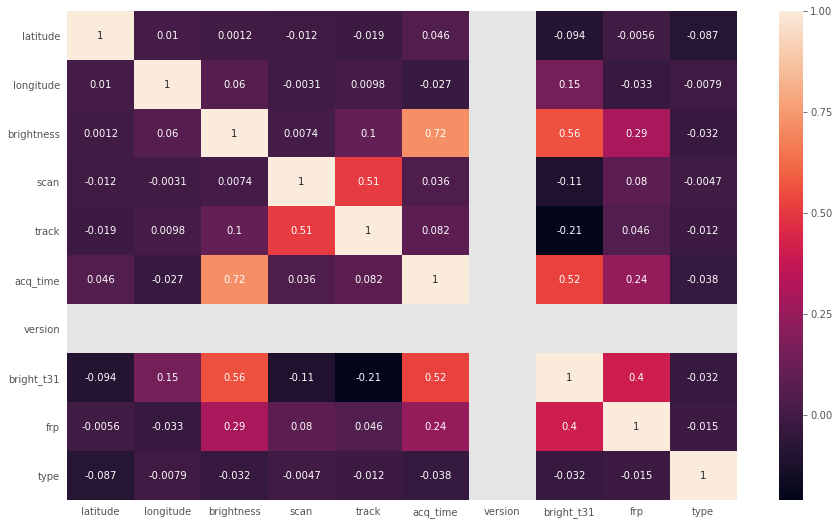

In [62]:
fig = plt.figure(figsize=(15,9))
sns.heatmap(incendios_df.corr(), annot=True);

## Distribuição das variaveis qualitativas.

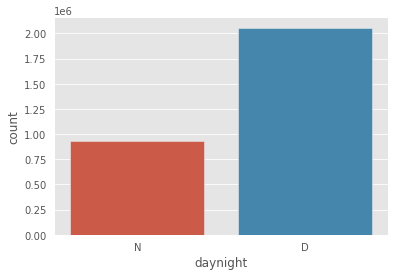

In [63]:
sns.countplot(x = incendios_df["daynight"]);

### Assim como pode ser observado no grafico os maiores focos de incendios ocorrem durante o dia.

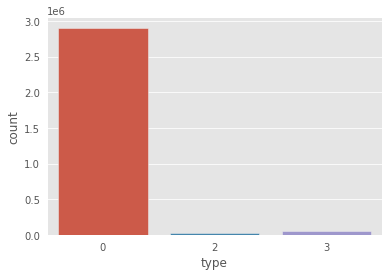

In [64]:
sns.countplot(x = incendios_df["type"]);

### Podemos observar no grafico que a grande maioria dos focos de incendios sao em vegetacoes.

In [65]:
df = incendios_df.copy()

In [66]:
reslt_df = df.loc[df['type'] != 0]

In [67]:
reslt_df.type.unique()

array([2, 3])

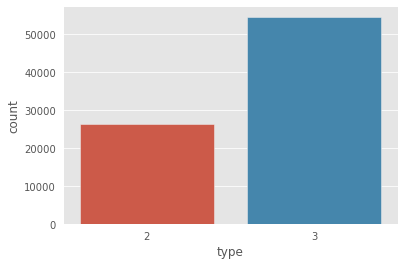

In [68]:
sns.countplot(x= 'type', data= reslt_df);

### Fazendo uma analise apenas com os focos de incendios ocorridos em outra parte estatica da terra e no mar, podemos observar no grafico que ainda temos uma quantidade significativa de incendios nesses pontos, tendo uma concentracao maior no mar.

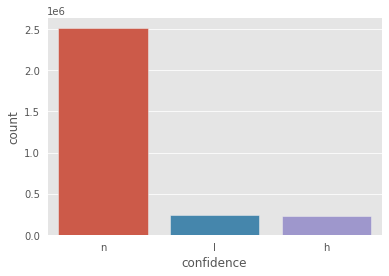

In [69]:
sns.countplot(x = incendios_df["confidence"]);

### Olhando pra confianca de que o algoritmo tem sobre ser um foco de incendio ou nao, fica claro pelo que o grafico mostra que a maioria esta no grau de confianca nominal.

## Transformando a variavel acq_time em formato de hora.

In [70]:
def transform_str(valor):
    transformed = str(valor).zfill(4)
    return transformed[0:2] + ':' + transformed[2:]

In [71]:
incendios_df['acq_time'] = incendios_df.acq_time.apply(transform_str)

In [72]:
def verfica_minutos(valor):
    minutos = valor[3:]
    minutos = valor.split(':')[1]
    return int(minutos) >= 60

In [73]:
incendios_df['consistencia_minutos'] = incendios_df.acq_time.apply(verfica_minutos)

In [74]:
incendios_df.query('consistencia_minutos == True').shape[0]

0

In [75]:
def get_hora(valor):
    hora = valor[:2]
    hora = valor.split(':')[0]
    return hora

In [76]:
incendios_df['hora'] = incendios_df.acq_time.apply(get_hora)

In [77]:
incendios_df.head()

,mes_fire,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,consistencia_minutos,hora
0,2020-01,-4.634367,-44.920513,330.36,0.39,0.36,2020-01-01,04:18,N,VIIRS,n,1,282.50,3.16,N,0,False,04
1,2020-01,-4.634920,-44.917027,308.77,0.39,0.36,2020-01-01,04:18,N,VIIRS,n,1,282.10,1.22,N,0,False,04
2,2020-01,-17.749628,-42.892834,319.87,0.52,0.42,2020-01-01,04:18,N,VIIRS,n,1,288.60,2.50,N,0,False,04
3,2020-01,-19.058695,-42.941364,303.55,0.54,0.42,2020-01-01,04:18,N,VIIRS,n,1,288.86,0.75,N,0,False,04
4,2020-01,-17.131834,-56.512676,313.63,0.35,0.57,2020-01-01,04:18,N,VIIRS,n,1,280.71,1.63,N,0,False,04


### Distribuicao da variavel hora com a intensidade de focos de incendios por hora.

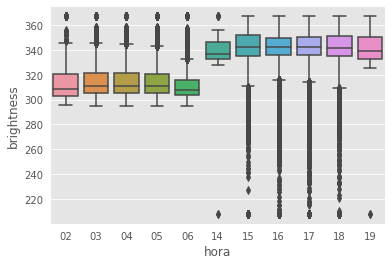

In [78]:
sns.boxplot(x="hora", y="brightness", data=incendios_df);

### Analisando pela quantidade de dados que temos, incendios com maior intensidade ocorrem no periodo entre 14h e 19h.

### O grafico abaixo mostra a quantidade de incendios ocorridos por hora.

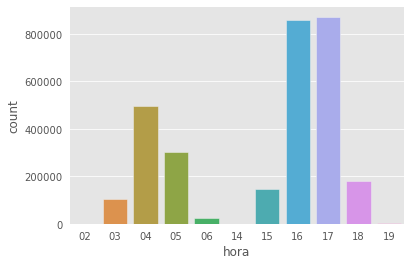

In [79]:
sns.countplot(x="hora", data=incendios_df);

### Podemos ver no grafico que os maiores casos de incendios ocorrem no periodo entre 16h e 17h.